In [23]:
import folium
import base64
import matplotlib.pyplot as plt
from scipy import ndimage
from folium import IFrame
import pandas as pd
from folium.plugins import Search
import datetime

* Todo

* 1. Date로 Filtering
* 2. Date로 검색
* 3. Keyword로 Filtering
* 4. Keyword로 검색

In [19]:
df = pd.read_excel('./data/유연노윤데이트.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df['Keyword'] = df['Keyword'].fillna('')

In [20]:
m = folium.Map(location=[37.5139598,127.1069059], zoom_start=5)

In [27]:
def to_compatibility(ix = 0):
    imgs = [plt.imread('./data/'+x) for x in df.loc[ix, 'Image'].split(';')]
    if len(imgs)==3:
        fig = plt.figure()
        a = fig.add_subplot(1, 3, 1)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[0], 270))
        b = fig.add_subplot(1, 3, 2)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[1], 270))
        c = fig.add_subplot(1, 3, 3)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[2], 270))
        fig.savefig('%s.png'%ix)

    elif len(imgs)==3:
        fig = plt.figure()
        a = fig.add_subplot(1, 2, 1)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[0], 270))
        b = fig.add_subplot(1, 2, 2)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[1], 270))
        fig.savefig('%s.png'%ix)

    elif len(imgs)==1:
        fig = plt.figure()
        a = fig.add_subplot(1, 1, 1)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[0], 270))
        fig.savefig('%s.png'%ix)

def to_map(encoded, lat, lon, date='2020-03-16'):
    resolution, width, height = 75, 7, 3
    html = '<img src="data:image/png;base64,{}">'.format
    iframe = IFrame(html(encoded), width=(width*resolution)+20, height=(height*resolution)+20)
    popup = folium.Popup(iframe, max_width=2650)

    icon = folium.Icon(color="red", icon="ok")
    marker = folium.Marker(location=[lat,lon], popup=popup, icon=icon,
                  tooltip=date)
    x = marker.add_to(m)

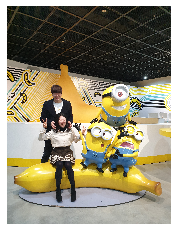

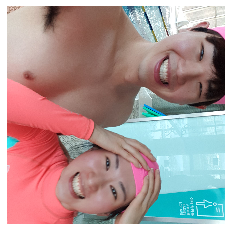

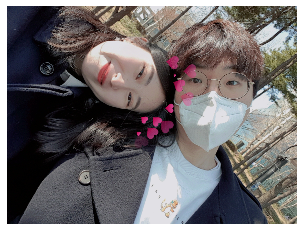

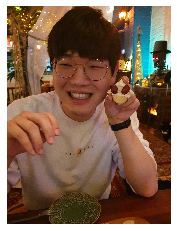

In [28]:
for ix in list(df.index):
    to_compatibility(ix)
    encoded = base64.b64encode(open('%s.png'%ix, 'rb').read()).decode()
    to_map(encoded, df.loc[ix, 'Lat'], df.loc[ix, 'Lon'], str(df.loc[ix, 'Date'].date())+' '+df.loc[ix, 'Keyword'])

In [ ]:
m

In [8]:
m.save('version_%s.html'%str(datetime.datetime.now().date()).replace('-',''))